#### CANB8347 Machine Learning Project
Trying out supervised ML methods on pre-cleaned and imputed dataset
##### 2) Algorithm development

In [1]:
from ml_utils import *

# additional sklearn tools
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [6]:
# read in data that has been preprocessed to only contain numeric values
vlbw = pd.read_csv('data/vlbw_train_imputed.csv')

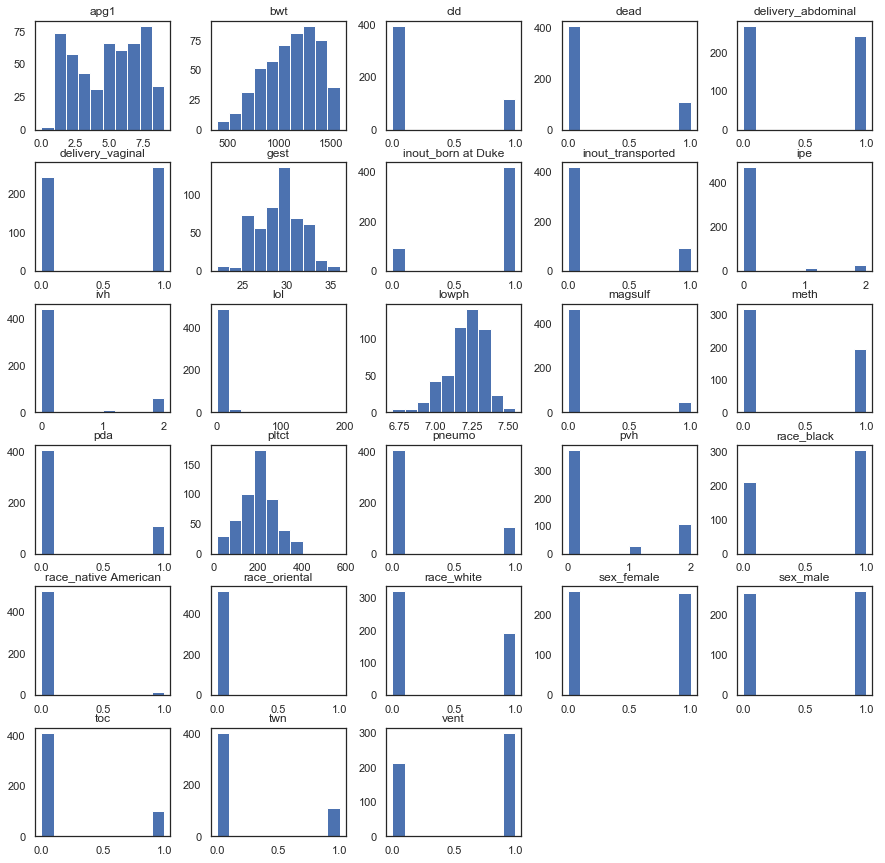

In [7]:
vlbw.hist(figsize=(15,15), grid=False)
plt.show()

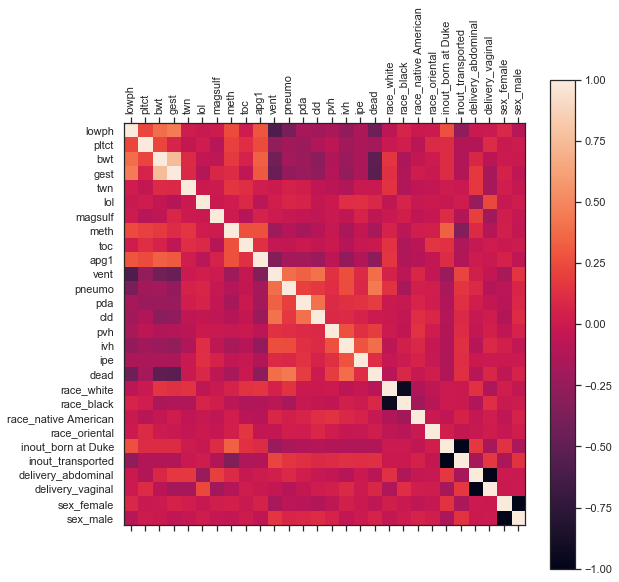

In [8]:
# plot correlation matrix for all features in numeric dataset
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
cax = ax.matshow(vlbw.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(vlbw.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(vlbw.columns)
plt.xticks(rotation='vertical')
ax.set_yticklabels(vlbw.columns)
plt.show()

pull out labels for data as the column that we want to predict (live births)  
then, drop that column from the training data to ignore it in our algorithms

In [9]:
labels = vlbw['dead']
vlbw.drop('dead', axis=1, inplace=True)

In [10]:
# normalize each column to fractional representation between 0 and 1
vlbw_norm = normalize(vlbw, axis=1, norm='l1')
vlbw_norm.shape

(513, 27)

In [11]:
# use kfold split function to divide data and labels
vlbw_splits = kfold_split(vlbw_norm, labels, 5, seed=18)

---
Try some supervised ML algorithms on the training data and labels

In [12]:
# Logistic regression classifier
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial', max_iter=1000)
clf.fit(vlbw_splits['train']['data'][0], vlbw_splits['train']['labels'][0])
prediction = clf.predict(vlbw_splits['test']['data'][0])
# calculate confusion matrix of results
cm = metrics.confusion_matrix(vlbw_splits['test']['labels'][0], prediction)

In [13]:
cm_metrics(cm)

(0.7766990291262136, 0.8181818181818182, 0.3, 0.9726027397260274)

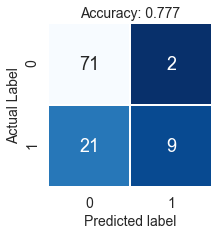

In [14]:
plot_cm(cm)

In [15]:
# KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(vlbw_splits['train']['data'][0], vlbw_splits['train']['labels'][0])
prediction = neigh.predict(vlbw_splits['test']['data'][0])
# calculate confusion matrix of results
cm = metrics.confusion_matrix(vlbw_splits['test']['labels'][0], prediction)
cm_metrics(cm)

(0.7669902912621359, 0.875, 0.23333333333333334, 0.9863013698630136)

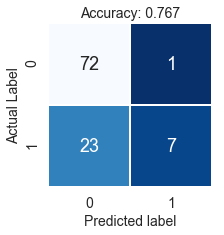

In [16]:
plot_cm(cm)

In [17]:
# random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(vlbw_splits['train']['data'][0], vlbw_splits['train']['labels'][2])
prediction = rf.predict(vlbw_splits['test']['data'][0])
# calculate confusion matrix of results
cm = metrics.confusion_matrix(vlbw_splits['test']['labels'][0], prediction)

In [18]:
RFfeatures = pd.DataFrame(list(zip(list(vlbw.columns), rf.feature_importances_)))
RFfeatures.index = RFfeatures.iloc[:,0]
RFfeatures.iloc[:,1].rank().sort_values()

0
race_oriental            1.0
ipe                      2.0
race_native American     3.0
magsulf                  4.0
ivh                      5.0
pda                      6.0
inout_transported        7.0
toc                      8.0
race_white               9.0
pneumo                  10.0
meth                    11.0
twn                     12.0
sex_male                13.0
cld                     14.0
delivery_abdominal      15.0
pvh                     16.0
sex_female              17.0
lol                     18.0
race_black              19.0
inout_born at Duke      20.0
vent                    21.0
delivery_vaginal        22.0
lowph                   23.0
bwt                     24.0
apg1                    25.0
pltct                   26.0
gest                    27.0
Name: 1, dtype: float64

In [19]:
cm_metrics(cm)

(0.7378640776699029,
 0.7142857142857143,
 0.16666666666666666,
 0.9726027397260274)

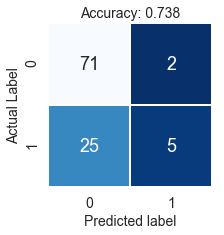

In [20]:
plot_cm(cm)